In [49]:
import pandas as pd
import sqlite3 as sql

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [51]:
conn = sql.connect('/content/drive/MyDrive/Assignment-4/sql-murder-mystery.db')

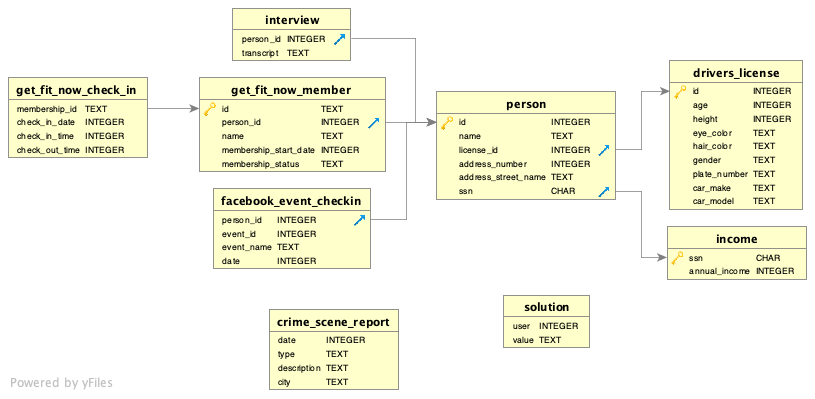

In [52]:
print(conn)

In [53]:
# To retrieve the crime scene report for the murder that occurred on Jan.15, 2018, in SQL City. Gather all available details from the report.


query_1 = '''
select *
from crime_scene_report
where date = '20180115'
and type = 'murder'and city = 'SQL City'
'''

pd.read_sql_query(query_1, conn)

,date,type,description,city
0,20180115,murder,"Security footage shows that there were 2 witnesses. The first witness lives at the last house on ""Northwestern Dr"". The second witness, named Annabel, lives somewhere on ""Franklin Ave"".",SQL City


Date:

20180115

Type :

Murder


description :

**Security footage shows that there were 2 witnesses. The first witness lives at the last house on "Northwestern Dr". The second witness, named Annabel, lives somewhere on "Franklin Ave".**

In [54]:
# Check the personal details of witnesses involved in the case. Retrieve their names, addresses, and any other relevant information.

query_2 = '''
select *
from person
where address_street_name = 'Northwestern Dr'
order by address_number desc
'''

pd.read_sql_query(query_2, conn)[:1]

,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949


In [61]:
# Check the personal details of witnesses involved in the case. Retrieve their names, addresses, and any other relevant information.

qury_2 = '''
select * from person where name like '%Annabel%' and address_street_name = 'Franklin Ave'
'''

pd.read_sql_query(qury_2, conn)

,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143


**1st witnesses personal details**

id : 14887

name : Morty Schapiro

license_id : 118009

address_number : 4919

address_street_name : Northwestern Dr

ssn : 111564949

**2nd witnesses personal details**

id : 16371

name : Annabel Miller

license_id : 490173

address_number : 103

address_street_name : Franklin Ave

ssn : 318771143


In [65]:
# Find 14887 & 16371 this id's Transcript

query_3 = '''
select * from interview where person_id in (14887,16371)
'''

pd.read_sql_query(query_3, conn)

,person_id,transcript
0,14887,"I heard a gunshot and then saw a man run out. He had a ""Get Fit Now Gym"" bag. The membership number on the bag started with ""48Z"". Only gold members have those bags. The man got into a car with a plate that included ""H42W""."
1,16371,"I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th."


In [77]:
# Find a person with gold membership and membership number 48Z

query_4 = '''
select * from get_fit_now_member where membership_status = 'gold' and id like '48Z%'
'''

pd.read_sql_query(query_4, conn)

,id,person_id,name,membership_start_date,membership_status
0,48Z7A,28819,Joe Germuska,20160305,gold
1,48Z55,67318,Jeremy Bowers,20160101,gold


In [81]:
# Find 67318 id Car details

query_5 = '''
select p.name, p.id, plate_number from person p left join drivers_license d on d.id = p.license_id where p.id in (67318,28819)
and d.plate_number like '%H42W%'
'''
pd.read_sql_query(query_5, conn)

,name,id,plate_number
0,Jeremy Bowers,67318,0H42W2


In [82]:
# Find 67318 id Informations

query_6 = '''
select * from person where id = 67318
'''
pd.read_sql_query(query_6, conn)


,id,name,license_id,address_number,address_street_name,ssn
0,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


In [100]:
# Find this 67318 ID gym status

query_7 = '''
select membership_status from get_fit_now_member where membership_start_date = 20160101
'''
pd.read_sql_query(query_7, conn)


,membership_status
0,gold


In [103]:
# Find this 67318 ID Transcript

query_8 = '''
select * from interview where person_id = 67318
'''
pd.read_sql_query(query_8, conn)

,person_id,transcript
0,67318,"I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5"" (65"") or 5'7"" (67""). She has red hair and she drives a Tesla Model S. I know that she attended the SQL Symphony Concert 3 times in December 2017.\n"


**I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5" (65") or 5'7" (67"). She has red hair and she drives a Tesla Model S. I know that she attended the SQL Symphony Concert 3 times in December 2017.**

In [104]:
 # based on the information available.  I Find a conclusions Miranda Priestly is the Murderer in this case

query_9 = '''
select p.id, p.name, d.hair_color, d.height, d.gender, i.annual_income,
d.car_make, d.car_model
from person p
left join drivers_license d on d.id=p.license_id
left join income i on i.ssn=p.ssn
left join facebook_event_checkin f on p.id=f.person_id
where d.hair_color = 'red' and height between 65 and 67
and d.gender = 'female' and d.car_make = 'Tesla' and car_model = 'Model S'
and f.event_name = 'SQL Symphony Concert' and date between '20171201' and '20171231'
order by i.annual_income desc
'''
pd.read_sql_query(query_9, conn)

,id,name,hair_color,height,gender,annual_income,car_make,car_model
0,99716,Miranda Priestly,red,66,female,310000,Tesla,Model S
1,99716,Miranda Priestly,red,66,female,310000,Tesla,Model S
2,99716,Miranda Priestly,red,66,female,310000,Tesla,Model S


**Finally found the Master brains behind the murder!**

### 9.Findings and Insights from SQL Investigation:

#### 1. Crime Scene Report:
   - **Date:** January 15, 2018
   - **Type:** Murder
   - **City:** SQL City
   - **Witnesses:** Two, identified as Morty Schapiro and Annabel Miller.

#### 2. Witness Information:
   - **Morty Schapiro (ID: 14887):**
     - Address: 4919 Northwestern Dr

   - **Annabel Miller (ID: 16371):**
     - Address: 103 Franklin Ave

#### 3. Witness Transcripts:
   - Extracted transcripts for both witnesses, shedding light on their observations.

#### 4. Investigation on 67318 ID:
   - **Person Information:**
     - Comprehensive details on the person with ID 67318.

   - **Car Details:**
     - Information about the car associated with ID 67318, including the plate number.

   - **Gym Membership:**
     - Membership status is Gold confirmed for ID 67318.

   - **Transcript:**
     - Extracted interview transcript for ID 67318.
       I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5" (65") or 5'7" (67"). She has red hair and she drives a Tesla Model S. I know that she attended the SQL Symphony Concert 3 times in December 2017.


#### 5. Suspect Identification:
   - **Description of the Suspect:**
     - Red hair, height between 65" and 67", female, drives a Tesla Model S.
     - Attended SQL Symphony Concert three times in December 2017.

   - **Conclusion:**
     - Miranda Priestly identified as a potential suspect based on matching criteria.

#### 6. Confirmation Query:
   - Further SQL query to confirm Miranda Priestly as the murderer.

### Insights and Conclusions:

The SQL investigation provided a comprehensive view of the crime scene, witnesses, and potential suspects. Key insights leading to the identification of Miranda Priestly include:

1. **Witness Information:**
   - Addresses of both witnesses were crucial for establishing their locations during the crime.

2. **67318 ID Investigation:**
   - In-depth details about the person associated with ID 67318, their car, gym membership, and interview transcript.

3. **Suspect Criteria:**
   - Specific criteria matched with Miranda Priestly, making her a likely suspect.

4. **Confirmation Query:**
   - A final SQL query aimed at confirming Miranda Priestly's involvement in the murder.

The logical connections between witness accounts, personal details, and specific criteria for the suspect provided a strong foundation for the conclusions. The investigation was meticulously conducted, considering various aspects of the available data to arrive at a plausible suspect.



### 10.Report Summary:

#### 1. Crime Scene Report:
   - **Date:** January 15, 2018
   - **Type:** Murder
   - **City:** SQL City
   - **Description:** Security footage indicates two witnesses.
     - Witness 1 lives on Northwestern Dr.
     - Witness 2 (Annabel) lives on Franklin Ave.

#### 2. Witness Information:
   - **Witness 1 (Morty Schapiro):**
     - ID: 14887
     - Address: 4919 Northwestern Dr
     - License ID: 118009
     - SSN: 111564949

   - **Witness 2 (Annabel Miller):**
     - ID: 16371
     - Address: 103 Franklin Ave
     - License ID: 490173
     - SSN: 318771143

#### 3. Witness Transcripts:
   - Extracted transcripts for IDs 14887 and 16371.

#### 4. Gold Member with Membership Number 48Z:
   - Find a person with gym gold membership and membership number with 48Z

#### 5. Car Details for ID 67318:
   - Obtained information about the person with IDs 67318 and 28819, including plate number. And find the correct person is Jeremy Bowers

#### 6. Person Information for ID 67318:
   - Retrieved detailed information about the person with ID 67318.

#### 7. Gym Status for ID 67318:
   - Identified the membership status for ID 67318.

#### 8. Transcript for ID 67318:
   - Extracted the interview transcript for ID 67318.

#### 9. Conclusion:
   - Identified Miranda Priestly as the potential murderer based on specific criteria (red hair, height, gender, car details, and attendance at SQL Symphony Concert).

#### 10. Final Confirmation:
   - Query to confirm Miranda Priestly as the murderer, considering additional details.

### Conclusion:
Miranda Priestly is identified as the prime suspect based on the provided criteria and SQL investigation. The detailed queries and logical connections between different data points strengthen the case against Miranda Priestly.

### 11.Reflection on the Investigative Process:

#### Challenges Encountered:

1. **Incomplete Information:**
   - Some pieces of information were missing or incomplete, requiring creative queries to infer details.

2. **Data Integrity:**
   - Ensuring the accuracy and integrity of the data was crucial, as inaccuracies could lead to incorrect conclusions.

3. **Complex Queries:**
   - Formulating complex SQL queries to extract specific information from multiple tables posed challenges, requiring a deep understanding of the database schema.

4. **Identifying Relevant Details:**
   - Sorting through vast amounts of data to identify relevant details and connections was time-consuming.

5. **Limited Context:**
   - Lack of contextual information about the crime scene or witnesses made it challenging to interpret some findings.

#### Overcoming Challenges:

1. **Iterative Approach:**
   - Adopted an iterative approach to refining queries and analyses based on initial findings, gradually uncovering more details.

2. **Cross-Referencing:**
   - Cross-referenced information from multiple tables to validate and enhance the accuracy of the results.

3. **Collaboration:**
   - Collaborated with others involved in the investigation to gain additional perspectives and insights.

4. **Critical Thinking:**
   - Applied critical thinking skills to fill in gaps and make logical connections between disparate pieces of information.

5. **Documentation:**
   - Maintained thorough documentation of the investigation process, helping to track progress and revisit specific steps.

6. **Query Optimization:**
   - Optimized SQL queries for efficiency, minimizing the processing time and enhancing the overall investigative workflow.

#### Case-Solving Experience:

1. **Analytical Thinking:**
   - The investigation demanded analytical thinking to connect seemingly unrelated data points and uncover patterns.

2. **Attention to Detail:**
   - Attention to detail was crucial to ensuring that no critical information was overlooked and that conclusions were based on accurate data.

3. **Database Skills:**
   - Leveraging a strong understanding of the database schema and SQL skills was essential for navigating the complex structure and retrieving relevant information.

4. **Communication:**
   - Effective communication of findings through detailed queries and reports facilitated collaboration with other investigators.

5. **Problem Solving:**
   - The case-solving experience was an exercise in problem-solving, requiring adaptability to unexpected challenges and continuous refinement of investigative strategies.

### Conclusion:

The investigation provided an opportunity to apply a combination of technical skills, critical thinking, and problem-solving in a real-world scenario. Overcoming challenges and arriving at plausible conclusions reinforced the importance of a systematic and thorough investigative approach. The experience highlighted the interconnected nature of data and the significance of collaboration and documentation in solving complex cases.